## Current Fandango Movie Rating Analysis##

In this project, we will reasses Fandango Movie Ratings in order to check is there any discrepnacy between the given rates and actual ratings.

My goal is to check Fandango Movie Ratings by using data visualization and other data tools.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt

In [2]:
previous = pd.read_csv("fandango_score_comparison.csv")
fandango_previous = previous[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']].copy()
after = pd.read_csv("movie_ratings_16_17.csv")
fandango_after = after[['movie', 'year', 'fandango']].copy()

In [3]:
fandango_previous.head(3)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5


In [4]:
fandango_after.head(3)

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0


In [5]:
fandango_after.sample(10 , random_state=1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


In [6]:
sum(fandango_previous["Fandango_votes"] < 30)

0

In [7]:
fandango_previous["Year"] = fandango_previous["FILM"].str[-5:-1]
fandango_previous.head(2)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015


In [8]:
fandango_previous["Year"].value_counts()

2015    129
2014     17
Name: Year, dtype: int64

In [9]:
fandango_2015 = fandango_previous[fandango_previous["Year"] == "2015"].copy()
fandango_2015["Year"].value_counts()

2015    129
Name: Year, dtype: int64

In [10]:
fandango_after["year"].value_counts()

2016    191
2017     23
Name: year, dtype: int64

In [11]:
fandango_2016 = fandango_after[fandango_after["year"] == 2016].copy()
fandango_2016["year"].value_counts()

2016    191
Name: year, dtype: int64

In [12]:
from numpy import arange
plt.style.use('fivethirtyeight')

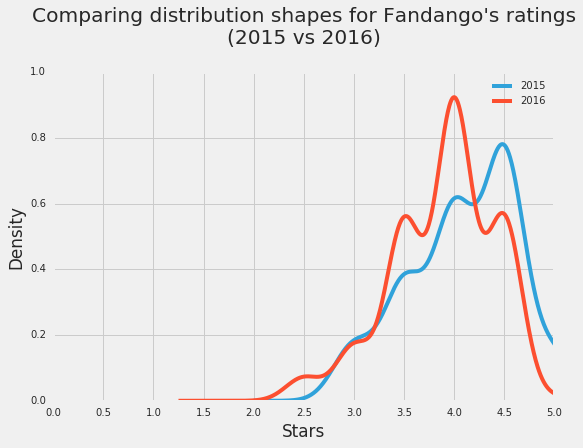

In [14]:
fandango_2015['Fandango_Stars'].plot.kde(label = '2015', legend = True, figsize = (8,5.5))
fandango_2016["fandango"].plot.kde(label="2016" , legend=True)

plt.title("Comparing distribution shapes for Fandango's ratings\n(2015 vs 2016)",
          y = 1.07)
plt.xlabel("Stars")
plt.xlim(0,5)
plt.xticks(arange(0,5.1,0.5))
plt.show()

In [15]:
print("2015" + "\n" + "-" * 16)
fandango_2015["Fandango_Stars"].value_counts(normalize = True).sort_index() *100


2015
----------------


3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [16]:
print("2016" + "\n" + "-" * 16)
fandango_2016["fandango"].value_counts(normalize = True).sort_index() *100


2016
----------------


2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

In [21]:
mean_2015 = fandango_2015["Fandango_Stars"].mean()
mean_2016 = fandango_2016["fandango"].mean()

median_2015 = fandango_2015["Fandango_Stars"].median()
median_2016 = fandango_2016["fandango"].median()

mode_2015 = fandango_2015["Fandango_Stars"].mode()[0]
mode_2016 = fandango_2016["fandango"].mode()[0]

summary = pd.DataFrame()

summary["2015"] = [mean_2015,median_2015,mode_2015]
summary["2016"] = [mean_2016,median_2016,mode_2016]
summary.index = ["mean","median","mode"]
summary



,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


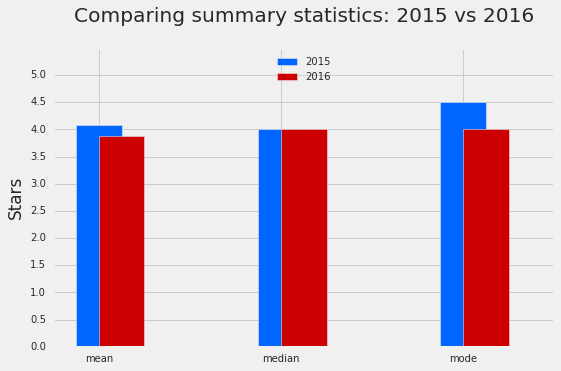

In [22]:
plt.style.use('fivethirtyeight')
summary['2015'].plot.bar(color = '#0066FF', align = 'center', label = '2015', width = .25)
summary['2016'].plot.bar(color = '#CC0000', align = 'edge', label = '2016', width = .25,
                         rot = 0, figsize = (8,5))

plt.title('Comparing summary statistics: 2015 vs 2016', y = 1.07)
plt.ylim(0,5.5)
plt.yticks(arange(0,5.1,.5))
plt.ylabel('Stars')
plt.legend(framealpha = 0, loc = 'upper center')
plt.show()


In [23]:
(summary.loc['mean'][0] - summary.loc['mean'][1]) / summary.loc['mean'][0]

0.04842683568951993